## Cuerpo

Ante la escalada del precio del crudo sube el valor de las empresas petroleras, entonces ... ¿las de energía renovables se desvalorizan? ¿qué sucede?
¿Existe alguna relación entre el valor del barril y el valor de capitalización de las mismas?

El objetivo de este artículo es establecer si existe alguna relación entre el valor de una empresa de energía (valor de capitalización de mercado vía stock price) y el precio del petróleo (WTI), para este caso analizamos las empresas petroleras y las de energías renovables.

Dicha relación la construiremos a través del grado de correlación existente entre el stock price y el valor del barril de petróleo.

Para dar marco al análisis y establecer un principio de trabajo comenzamos con la inspección de los ETF asociados (exchange traded funds),estos son fondos públicos que cotizan en un exchange del cual subyacen varios activos (acciones de empresas) en su conformación, se adquieren de una forma muy sencilla y tienen bajos costos de operación.

Como nos interesa analizar las empresas relacionadas al petróleo y las renovables, nos enfocaremos en los tres ETF más representativos (esto es, grado de liquidez y capitalización bursátil) de cada industria, los cuales serían: XLE (energéticas de petróleo), ICLN y QCLN (energéticas renovables-limpias)

XLE: es el ETF que proporciona exposición a las compañías de gas y petróleo, como así también a equipos y servicios aociados. XLE comenzo a cotizar en el año 1998 y el valor de sus holdings bajo administración es de $MM 35,440 aproximadamente. Entre las principales empresas cotizantes en el ETF se destacan Chevron, Exxon Mobil y EOG Resources, para el listado completo de las empresas pueden seguir el link:

https://marketchameleon.com/Overview/XLE/Holdings/

ICLN: es el ETF que representa a empresas productoras de energía solar, eólica y otras fuentes renovables, es decir, está dirigido a acciones de energía limpia de todo el mundo. ICLN cotiza públicamente desde el año 2008 y su patrimonio de gestión es de aproximadamente $MM 5,227. En este fondo se destacan Enphase Energy, Consolidated Edison	y Solaredge Technologies. El listado completo de los holdings lo pueden obtener en el link:

https://marketchameleon.com/Overview/ICLN/Holdings/

QCLN: es el ETF que proporciona acceso a empresas que se desempeñan con las tecnologías asociadas a energía solar fotovoltaica, los biocombustibles o las baterías avanzadas, entre las cuales se destacan ON Semiconductor, Tesla y Enphase Energy. QCLN cotiza públicamente desde el año 2007 y sus activos bajo administración son de aproximadamente $MM 2,006. El listado completo de las empresas participantes lo encuentran en este link:

https://marketchameleon.com/Overview/QCLN/Holdings/

El dato asociado al stock price de cada empresa cotizante en el ETF asociado lo importaremos desde la API site.financialmodelingprep.com, el precio del petróleo (WTI) lo importaremos desde fred.stlouisfed.org (Federal Reserve Bank of St. Louis)

Una vez realizado el request, ambos files se copiarán en formato Excel para su posterior manipulación.

Ulizando la librería Pandas Profiling (pandas_profiling.ProfileReport(macro)) realizamos la primera exploración/QC de datos a fin de determinar valores anómalos (nulos, negativos, vacíos)

En la sección Overview se detalla el summary de todas las variables, en principio se observa una buena calidad de datos, sin embargo, al recorrer el detalle de cada variable, nos detenemos en la variable "WTI" que presenta un valor negativo (-36.98), el cual deberá ser removido.

Una vez realizado el request, ambos files se copiarán en formato Excel para su posterior manipulación.

In [1]:
import numpy as np, pandas as pd
import seaborn as sns
import os, requests

from matplotlib import pyplot as plt

In [2]:
# Módulo de importanción de stock price vía API financialmodlingprep.com
# Gestionen su propio API key.

def getPrice(symbol):
    """
    Historical Daily Prices
    Dado un activo (symbol), retorna unicamente su closing price historico (máx 40 years)
    Return: daily dataframe (close)
    """        
    try:
        url='https://financialmodelingprep.com/api/v3/historical-price-full/'+symbol
        api_key='xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx' # Generen su propio API KEY (es free)
        p= {'serietype' : 'line','apikey': api_key}
        r=requests.get(url,params=p)
        js=r.json()
        df=pd.DataFrame(js['historical'])
        df.set_index('date',inplace=True)
        df.index=pd.to_datetime(df.index)
        df.rename(columns={'close':'price'},inplace=True)
        df.sort_values('date',ascending=True, inplace=True)
        
        return df

    except:
        print(symbol,' Historical daily prices not found')

In [2]:
# Holdings de cada ETF
ticker_xle=['CVX','XOM','EOG','COP','SLB','PXD','OXY','MPC','WMB','PSX']
ticker_icln=['ENPH','ED','SEDG','PLUG','FSLR','RUN','REGI','BE','CIG','ORA']
ticker_qcln=['ON','TSLA','ENPH','ALB','SEDG','NIO','BEP','WOLF','PLUG','FSLR']

In [67]:
#Rutina de única vez para guardar los datos en Excel
df_oil=getPrice('XLE')
df_oil.rename(columns={'price':'XLE'},inplace=True)
for ticker in ticker_xle:
    df_oil=pd.concat([df_oil,getPrice(ticker)],axis=1)
    df_oil.rename(columns={'price':ticker},inplace=True)

path='C:\\Users\\Usuario\\Dataset\\MVP_L2'
os.chdir(path)
df_oil.to_excel('DF_OIL.xlsx')

In [6]:
#Rutina de única vez para guardar los datos en Excel
df_icln=getPrice('ICLN')
df_icln.rename(columns={'price':'ICLN'},inplace=True)
for ticker in ticker_icln:
    df_icln=pd.concat([df_icln,getPrice(ticker)],axis=1)
    df_icln.rename(columns={'price':ticker},inplace=True)

path='C:\\Users\\Usuario\\Dataset\\MVP_L2'
os.chdir(path)
df_icln.to_excel('DF_ICLN.xlsx')

In [7]:
#Rutina de única vez para guardar los datos en Excel
df_qcln=getPrice('QCLN')
df_qcln.rename(columns={'price':'QCLN'},inplace=True)
for ticker in ticker_qcln:
    df_qcln=pd.concat([df_qcln,getPrice(ticker)],axis=1)
    df_qcln.rename(columns={'price':ticker},inplace=True)

path='C:\\Users\\Usuario\\Dataset\\MVP_L2'
os.chdir(path)
df_qcln.to_excel('DF_QCLN.xlsx')

In [3]:
# Rutina de recupero de datos
path='C:\\Users\\Usuario\\Dataset\\MVP_L2'
os.chdir(path)

wti=pd.read_excel('DCOILWTICO.xls',index_col='observation_date')
wti=wti.loc[wti['DCOILWTICO']!=-36.98] 
wti.rename(columns={'DCOILWTICO':'WTI'},inplace=True)

df_oil=pd.read_excel('DF_OIL.xlsx',index_col='date')
df_icln=pd.read_excel('DF_ICLN.xlsx',index_col='date')
df_qcln=pd.read_excel('DF_QCLN.xlsx',index_col='date')


Text(0.5, 1.0, 'Features Correlating')

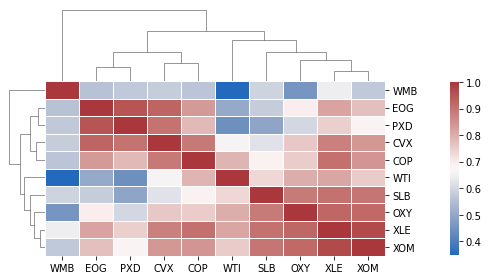

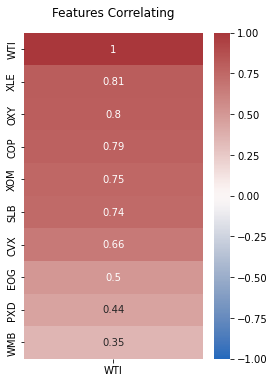

In [4]:
# Análisis de empresas petroleras versus WTI

macro=pd.concat([wti,df_oil],axis=1)
macro = macro.drop(['MPC','PSX'], axis=1) # Se eliminan por escasa disponibiliad de datos (corta historia para este análisis)
macro=macro.dropna()
sns.clustermap(macro.corr(),cmap='vlag',dendrogram_ratio=(.1,.3),cbar_pos=(1.05,.1,.02,.6),linewidths=1,figsize=(6,4))
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(macro.corr()[['WTI']].sort_values(by='WTI', ascending=False), vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_title('Features Correlating', fontdict={'fontsize':12}, pad=16)

Observamos del análisis de correlación que efectivamente el índice de las energéticas XLE es el que mayor se correlaciona con el valor de crudo WTI, lo cual es esperable.

En el caso de las empresas analizadas, es WMB (Williams Companies) la que menor correlación representa, presumiblemente por la exposición balanceada que tiene respecto al segmento de upstream, ya que es una compañía de Midstream.

Para evidenciar dicho comportamiento podemos graficar ambas dos para ver el detalle de su comportamiento.

In [23]:
var1_izq, var2_izq = ['XLE'],['WTI']
var1_der, var2_der = ['WMB'], ['WTI']

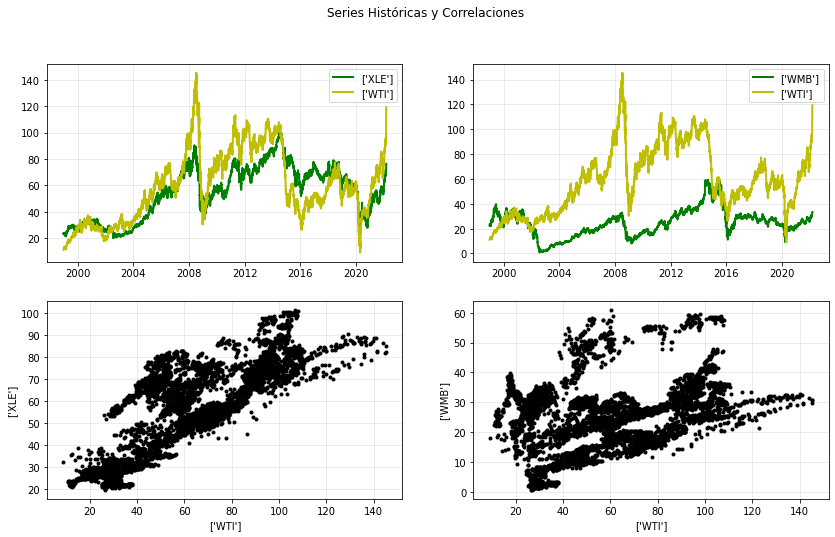

In [24]:

fig,ax =plt.subplots(figsize=(14,8),nrows=2,ncols=2)
fig.suptitle('Series Históricas y Correlaciones')

#ax[0][0].title.set_text(' ')
ax[0][0].grid('True',alpha=0.3)
ax[0][0].plot(macro[var1_izq],label=var1_izq,c='g',lw=2)
ax[0][0].plot(macro[var2_izq],label=var2_izq,c='y',lw=2)
ax[0][0].legend()

#ax[0][1].title.set_text(' ')
ax[0][1].grid('True',alpha=0.3)
ax[0][1].plot(macro[var1_der],label=var1_der,c='g',lw=2)
ax[0][1].plot(macro[var2_der],label=var2_der,c='y',lw=2)
ax[0][1].legend()

ax[1][0].plot(macro[var2_izq],macro[var1_izq], 'o', color='black',markersize=3)
ax[1][0].grid('True',alpha=0.3)
ax[1][0].set_xlabel(var2_izq)
ax[1][0].set_ylabel(var1_izq)

ax[1][1].plot(macro[var2_der],macro[var1_der], 'o', color='black',markersize=3)
ax[1][1].grid('True',alpha=0.3)
ax[1][1].set_xlabel(var2_der)
ax[1][1].set_ylabel(var1_der)

#plt.savefig('Correlaciones')
plt.show()

Text(0.5, 1.0, 'Features Correlating')

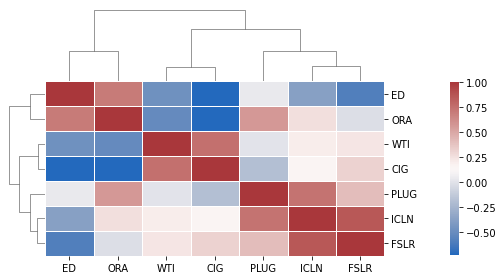

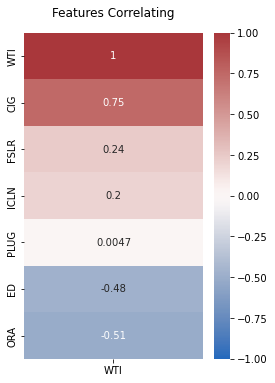

In [4]:
# Análisis de empresas renovables versus WTI

macro=pd.concat([wti,df_icln],axis=1)
macro = macro.drop(['ENPH','SEDG','RUN','REGI','BE'], axis=1) # Se eliminan por escasa disponibiliad de datos (corta historia para este análisis)
macro=macro.dropna()
sns.clustermap(macro.corr(),cmap='vlag',dendrogram_ratio=(.1,.3),cbar_pos=(1.05,.1,.02,.6),linewidths=1,figsize=(6,4))
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(macro.corr()[['WTI']].sort_values(by='WTI', ascending=False), vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_title('Features Correlating', fontdict={'fontsize':12}, pad=16)

En el caso de las energéticas renovables la correlación de su índice ICLN con el WTI es muy bajo (0.2), y dentro de dicho análisis se destacan dos empresas: CIG (correlación de 0.75) y ORA (correlación -0.51)

Para entender el comportamiento de la correlación podemos graficar las series temporales y sus gráficos de correlación asociadas a estas empresas.

En el caso de CIG es una empresa que no ha registrado al momento variaciones significativas en su valor, con lo cual, deberíamos de analizar mayores elementos para efectivamente validar la correlacion positiva de 0.75 con el WTI; en este caso, el core bussiness de CIG no respalda dicha correlación, recordemos que CIG es la Compañía Energética de Minas Gerais y su negocio es la generación, transmisión, disribución y venta de energía, mediante plantas hidroeléctricas, eólicas y solares.

ORA es Ormat Technologies, empresa relacionada a la energía geotérmica, solar y fotovoltaica, con alcance internacional de plantas operando en todo el mundo, en este caso el valor de correlación de -0.51 sí pareciera tener correlato con el segmento de negocio que ORA interviene, y presenta una buena oportunidad de diversifiación respecto al compartamiento del WTI.

In [5]:
var1_izq, var2_izq = ['CIG'],['WTI']
var1_der, var2_der = ['ORA'], ['WTI']

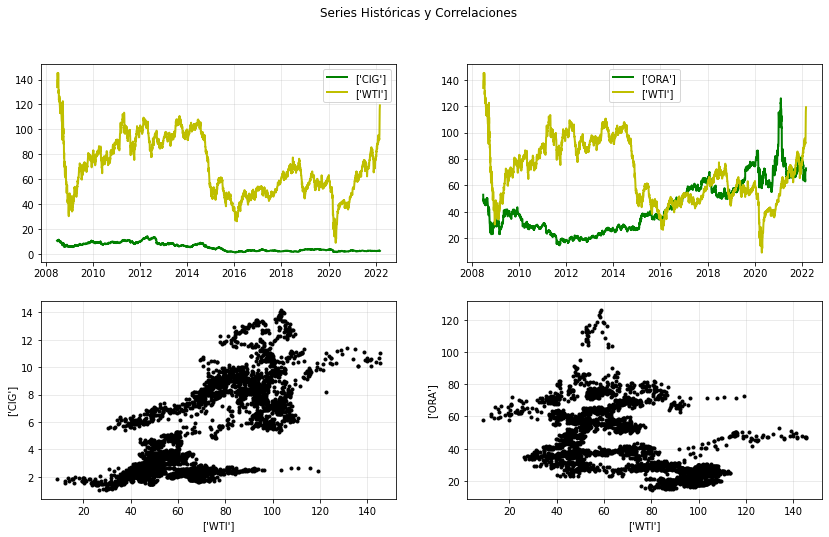

In [6]:

fig,ax =plt.subplots(figsize=(14,8),nrows=2,ncols=2)
fig.suptitle('Series Históricas y Correlaciones')

#ax[0][0].title.set_text(' ')
ax[0][0].grid('True',alpha=0.3)
ax[0][0].plot(macro[var1_izq],label=var1_izq,c='g',lw=2)
ax[0][0].plot(macro[var2_izq],label=var2_izq,c='y',lw=2)
ax[0][0].legend()

#ax[0][1].title.set_text(' ')
ax[0][1].grid('True',alpha=0.3)
ax[0][1].plot(macro[var1_der],label=var1_der,c='g',lw=2)
ax[0][1].plot(macro[var2_der],label=var2_der,c='y',lw=2)
ax[0][1].legend()

ax[1][0].plot(macro[var2_izq],macro[var1_izq], 'o', color='black',markersize=3)
ax[1][0].grid('True',alpha=0.3)
ax[1][0].set_xlabel(var2_izq)
ax[1][0].set_ylabel(var1_izq)

ax[1][1].plot(macro[var2_der],macro[var1_der], 'o', color='black',markersize=3)
ax[1][1].grid('True',alpha=0.3)
ax[1][1].set_xlabel(var2_der)
ax[1][1].set_ylabel(var1_der)

#plt.savefig('Correlaciones')
plt.show()

Text(0.5, 1.0, 'Features Correlating')

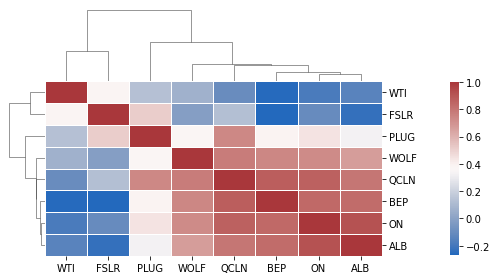

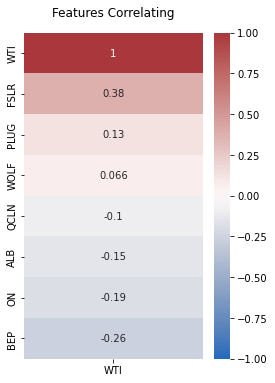

In [8]:
# Análisis de empresas renovables versus WTI

macro=pd.concat([wti,df_qcln],axis=1)
macro = macro.drop(['TSLA','ENPH','SEDG','NIO'], axis=1) # Se eliminan por escasa disponibiliad de datos (corta historia para este análisis)
macro=macro.dropna()
sns.clustermap(macro.corr(),cmap='vlag',dendrogram_ratio=(.1,.3),cbar_pos=(1.05,.1,.02,.6),linewidths=1,figsize=(6,4))
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(macro.corr()[['WTI']].sort_values(by='WTI', ascending=False), vmin=-1, vmax=1, annot=True, cmap='vlag')
heatmap.set_title('Features Correlating', fontdict={'fontsize':12}, pad=16)

En este caso el índice QCLN de las energéticas renovables y su correlación con el WTI es inexistente (-0.1), dentro del cual y dentro de dicho análisis podemos enfocarnos en dos empresas: FSLR (correlación de 0.38) y BEP (correlación -0.26)

FSLR presenta períodos en que su valor acompaña al WTI (eso explica la correlación positiva) al igual que otros tramos donde dicho acompañiamiento de desacopla, especialmente el útlimo año. Recordemos que FSLR es First Solar Inc, y provee soluciones de energía solar fotovoltaica, con lo cual períodos de correlación positiva con el WTI no indicarían posibilidad alguna de estar conectados, más bien, debería haber algún parámetros externo (por ejemplo creciemiento económico mundial) que lo explique.

BEP muestra un comportamiento interesante en los últimos años,especialmente mostrándose divergente ante la escalada de crudo. BEP es Brookfield Renewable Partners y es propietaria de un portfolio de plantas de generación de energía hidroeléctrica, eólica y solar, al igual que ORA, es una opción interesante como alternativa de posicionamiento en materia energética.

In [15]:
var1_izq, var2_izq = ['FSLR'],['WTI']
var1_der, var2_der = ['BEP'], ['WTI']

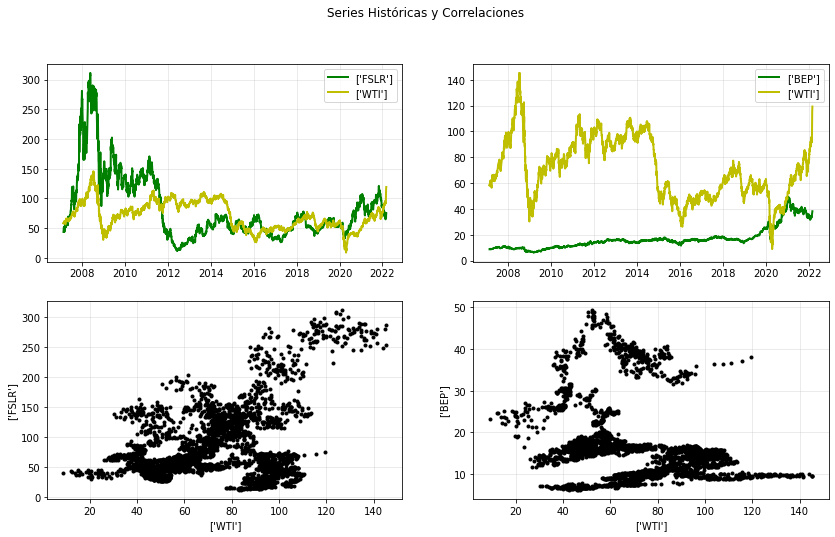

In [16]:

fig,ax =plt.subplots(figsize=(14,8),nrows=2,ncols=2)
fig.suptitle('Series Históricas y Correlaciones')

#ax[0][0].title.set_text(' ')
ax[0][0].grid('True',alpha=0.3)
ax[0][0].plot(macro[var1_izq],label=var1_izq,c='g',lw=2)
ax[0][0].plot(macro[var2_izq],label=var2_izq,c='y',lw=2)
ax[0][0].legend()

#ax[0][1].title.set_text(' ')
ax[0][1].grid('True',alpha=0.3)
ax[0][1].plot(macro[var1_der],label=var1_der,c='g',lw=2)
ax[0][1].plot(macro[var2_der],label=var2_der,c='y',lw=2)
ax[0][1].legend()

ax[1][0].plot(macro[var2_izq],macro[var1_izq], 'o', color='black',markersize=3)
ax[1][0].grid('True',alpha=0.3)
ax[1][0].set_xlabel(var2_izq)
ax[1][0].set_ylabel(var1_izq)

ax[1][1].plot(macro[var2_der],macro[var1_der], 'o', color='black',markersize=3)
ax[1][1].grid('True',alpha=0.3)
ax[1][1].set_xlabel(var2_der)
ax[1][1].set_ylabel(var1_der)

#plt.savefig('Correlaciones')
plt.show()

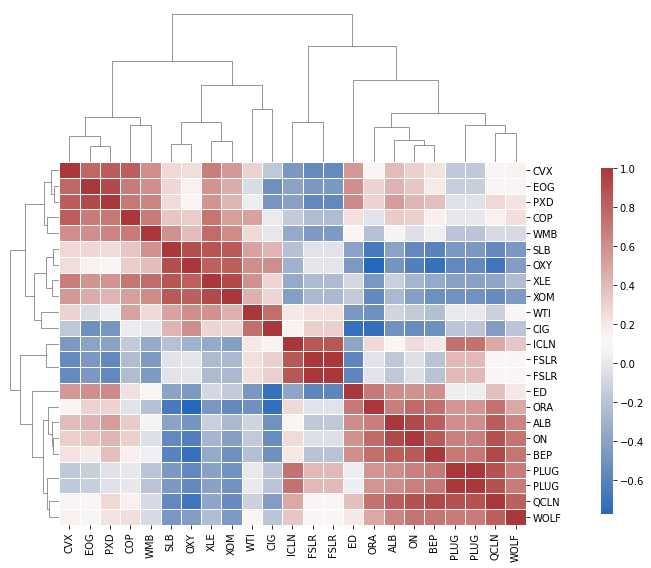

In [19]:
# Análisis de empresas petroleras y renovables versus WTI

macro=pd.concat([wti,df_oil,df_icln,df_qcln],axis=1)
macro = macro.drop(['ENPH','SEDG','RUN','REGI','BE','MPC','PSX','TSLA','ENPH','SEDG','NIO'], axis=1) 
macro=macro.dropna()
sns.clustermap(macro.corr(),cmap='vlag',dendrogram_ratio=(.1,.3),cbar_pos=(1.05,.1,.02,.6),linewidths=1,figsize=(8,8))
#plt.figure(figsize=(4, 8))
#heatmap = sns.heatmap(macro.corr()[['WTI']].sort_values(by='WTI', ascending=False), vmin=-1, vmax=1, annot=True, cmap='vlag')
#heatmap.set_title('Features Correlating', fontdict={'fontsize':12}, pad=16)

Finalmente e integrando todas las compañias analizadas podemos observar en el cluster map el agrupamiento de los distintos activos, es interesante enfatizar que WTI actúa como frontera entre las empresas petroleras y las de energía renovables.

In [24]:
var1_izq, var2_izq = ['OXY'],['ORA']
var1_der, var2_der = ['ORA'], ['WTI']

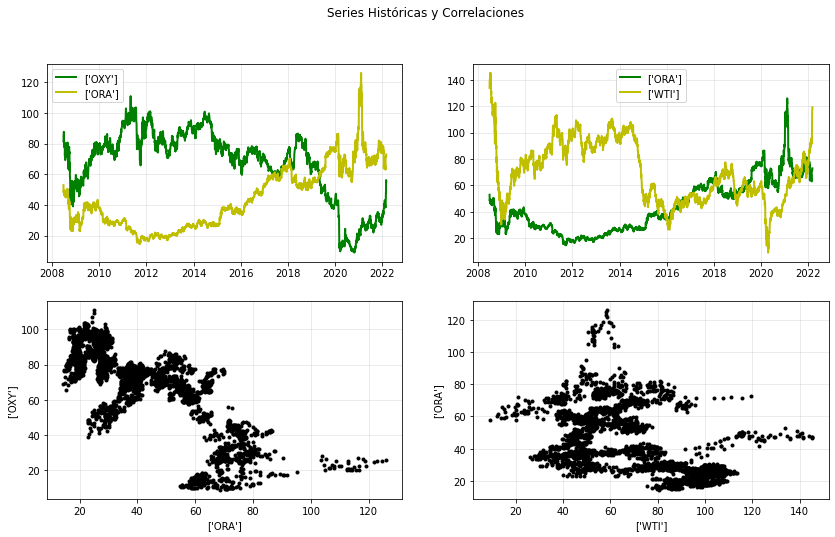

In [25]:

fig,ax =plt.subplots(figsize=(14,8),nrows=2,ncols=2)
fig.suptitle('Series Históricas y Correlaciones')

#ax[0][0].title.set_text(' ')
ax[0][0].grid('True',alpha=0.3)
ax[0][0].plot(macro[var1_izq],label=var1_izq,c='g',lw=2)
ax[0][0].plot(macro[var2_izq],label=var2_izq,c='y',lw=2)
ax[0][0].legend()

#ax[0][1].title.set_text(' ')
ax[0][1].grid('True',alpha=0.3)
ax[0][1].plot(macro[var1_der],label=var1_der,c='g',lw=2)
ax[0][1].plot(macro[var2_der],label=var2_der,c='y',lw=2)
ax[0][1].legend()

ax[1][0].plot(macro[var2_izq],macro[var1_izq], 'o', color='black',markersize=3)
ax[1][0].grid('True',alpha=0.3)
ax[1][0].set_xlabel(var2_izq)
ax[1][0].set_ylabel(var1_izq)

ax[1][1].plot(macro[var2_der],macro[var1_der], 'o', color='black',markersize=3)
ax[1][1].grid('True',alpha=0.3)
ax[1][1].set_xlabel(var2_der)
ax[1][1].set_ylabel(var1_der)

#plt.savefig('Correlaciones')
plt.show()

In [27]:
# Clusterización

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [40]:
data_x=macro['WTI']
data_y=macro['ORA']
label_x=data_x.name
label_y=data_y.name

arr = pd.concat([data_x,data_y],axis=1).dropna().to_numpy()
arr_esc = StandardScaler().fit_transform(arr)

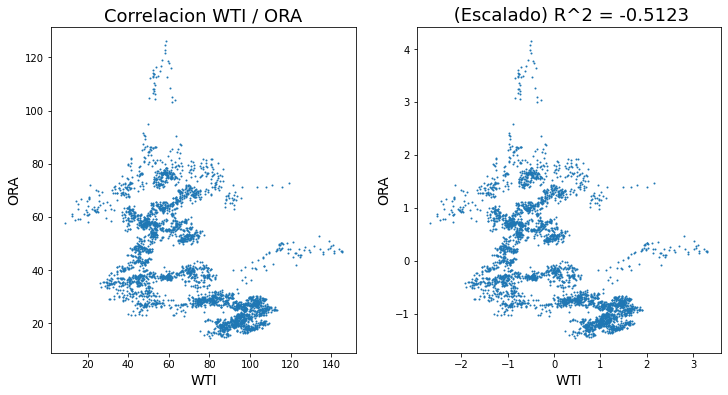

In [41]:
fig, ax = plt.subplots(figsize=(12,6), ncols=2)
r2 = data_x.corr(data_y).round(4)

titulo = 'Correlacion ' + data_x.name + ' / ' + data_y.name
ax[0].scatter(arr[:,0],arr[:,1], s=1) #scatter(x,y, s=1)
ax[0].set_title(titulo, fontsize=18)
ax[0].set_xlabel(data_x.name, fontsize=14)
ax[0].set_ylabel(data_y.name, fontsize=14)

titulo  = ' (Escalado) R^2 = ' + str(r2)
ax[1].scatter(arr_esc[:,0],arr_esc[:,1], s=1)
ax[1].set_title(titulo, fontsize=18)
ax[1].set_xlabel(data_x.name, fontsize=14)
ax[1].set_ylabel(data_y.name, fontsize=14)

plt.show()

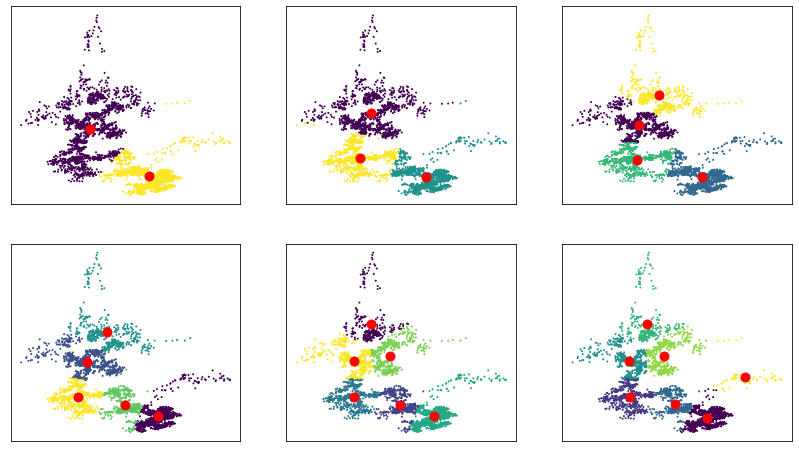

In [42]:
filas = 2
columnas = 3
fig, ax = plt.subplots(figsize=(14,8), nrows=filas, ncols=columnas)

for i in range (filas*columnas):
    col = i % columnas
    row = i // columnas
    modelo = KMeans(n_clusters = i+2)
    y_means = modelo.fit_predict(arr_esc)
    centroides = modelo.cluster_centers_
    ax[row][col].scatter(arr_esc[:,0], arr_esc[:,1], s=1, c=y_means)
    ax[row][col].scatter(centroides[:,0], centroides[:,1], s=80, color='r')
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)
    #ax[row][col].text(s = 'n='+str(i+2), fontsize=20, y=0, x=6)

plt.show()

In [46]:
n=3

In [47]:
arr = pd.concat([data_x,data_y],axis=1).dropna()
arr_esc = StandardScaler().fit_transform(arr)

arr=arr.reset_index()
arr.rename(columns={'index':'fecha'},inplace=True)



modelo = KMeans(n_clusters = n).fit(arr_esc)
y_means = modelo.fit_predict(arr_esc)
centroides = modelo.cluster_centers_ 

clustersList = list(y_means)
for i in range(len(arr)):
    arr.loc[i,'cluster'] = clustersList.pop()

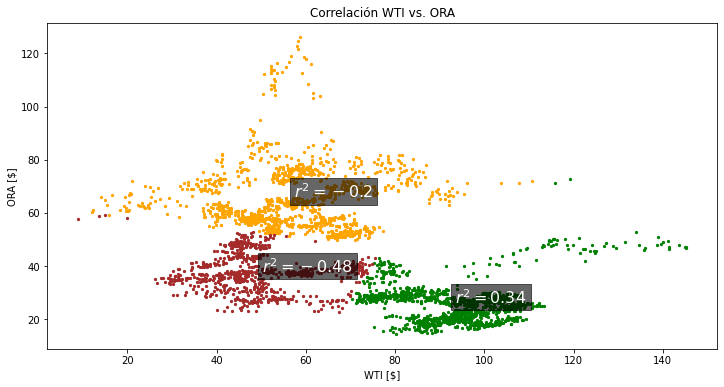

In [48]:
colores= ["orange","green","brown","cyan","magenta","blue","red","yellow","lightgreen","pink"]  
plt.figure(figsize=(12,6))
plt.title('Correlación ' + data_x.name + ' vs. ' + data_y.name)
plt.xlabel(data_x.name +' [$]')
plt.ylabel(data_y.name +' [$]')


for c in range(n):
        
    df_total = arr.loc[arr.cluster == c]
    co = round(df_total[label_x].corr(df_total[label_y]),2)

    plt.scatter(arr.loc[y_means == c][label_x],arr.loc[y_means == c][label_y],s=5, color=colores[c], cmap='rainbow')
            
    coords = (arr.loc[y_means==c][label_x].mean(), arr.loc[y_means==c][label_y].mean())
    t = plt.gca().annotate(f"$ r^2 = {co} $".format('g'), coords, fontsize=16, c="w")
    t.set_bbox(dict(facecolor='k', alpha=0.6, edgecolor='k'))
 
#plt.savefig('Clustering YPF')

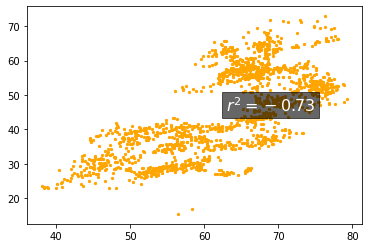

In [103]:
# Si quiero acceder a un cluster en particular seteo el valor de c

c=0

df_total = arr.loc[arr.cluster == c]
co = round(df_total[label_x].corr(df_total[label_y]),2)

plt.scatter(arr.loc[y_means == c][label_x],arr.loc[y_means == c][label_y],s=5, color=colores[c], cmap='rainbow')
        
coords = (arr.loc[y_means==c][label_x].mean(), arr.loc[y_means==c][label_y].mean())
t = plt.gca().annotate(f"$ r^2 = {co} $".format('g'), coords, fontsize=16, c="w")
t.set_bbox(dict(facecolor='k', alpha=0.6, edgecolor='k'))

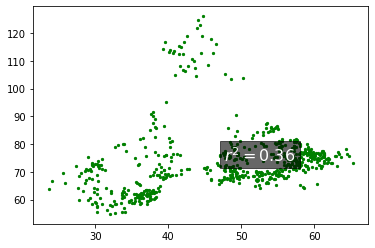

In [104]:
c=1

df_total = arr.loc[arr.cluster == c]
co = round(df_total[label_x].corr(df_total[label_y]),2)

plt.scatter(arr.loc[y_means == c][label_x],arr.loc[y_means == c][label_y],s=5, color=colores[c], cmap='rainbow')
        
coords = (arr.loc[y_means==c][label_x].mean(), arr.loc[y_means==c][label_y].mean())
t = plt.gca().annotate(f"$ r^2 = {co} $".format('g'), coords, fontsize=16, c="w")
t.set_bbox(dict(facecolor='k', alpha=0.6, edgecolor='k'))

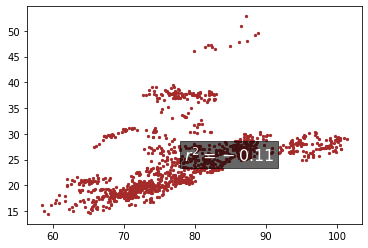

In [105]:
c=2

df_total = arr.loc[arr.cluster == c]
co = round(df_total[label_x].corr(df_total[label_y]),2)

plt.scatter(arr.loc[y_means == c][label_x],arr.loc[y_means == c][label_y],s=5, color=colores[c], cmap='rainbow')
        
coords = (arr.loc[y_means==c][label_x].mean(), arr.loc[y_means==c][label_y].mean())
t = plt.gca().annotate(f"$ r^2 = {co} $".format('g'), coords, fontsize=16, c="w")
t.set_bbox(dict(facecolor='k', alpha=0.6, edgecolor='k'))

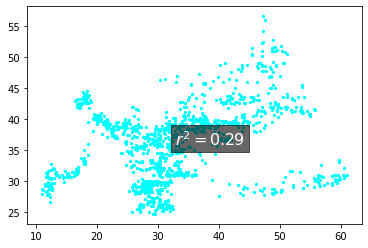

In [18]:
c=3

df_total = arr.loc[arr.cluster == c]
co = round(df_total[label_x].corr(df_total[label_y]),2)

plt.scatter(arr.loc[y_means == c][label_x],arr.loc[y_means == c][label_y],s=5, color=colores[c], cmap='rainbow')
        
coords = (arr.loc[y_means==c][label_x].mean(), arr.loc[y_means==c][label_y].mean())
t = plt.gca().annotate(f"$ r^2 = {co} $".format('g'), coords, fontsize=16, c="w")
t.set_bbox(dict(facecolor='k', alpha=0.6, edgecolor='k'))

In [ ]:
data_x=macro['ORA']
data_y=macro['OXY']

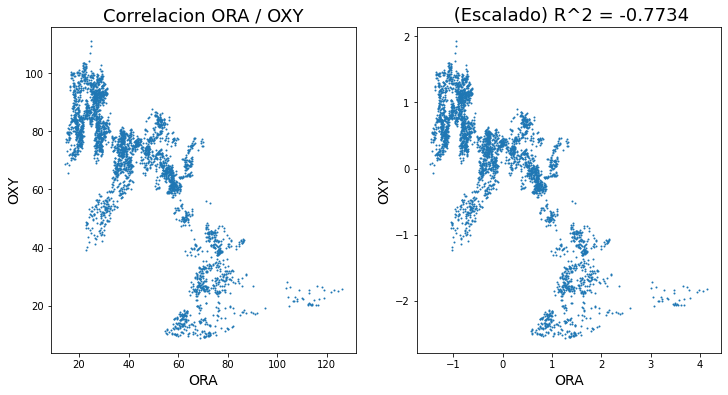

In [49]:
label_x=data_x.name
label_y=data_y.name

arr = pd.concat([data_x,data_y],axis=1).dropna().to_numpy()
arr_esc = StandardScaler().fit_transform(arr)
fig, ax = plt.subplots(figsize=(12,6), ncols=2)
r2 = data_x.corr(data_y).round(4)

titulo = 'Correlacion ' + data_x.name + ' / ' + data_y.name
ax[0].scatter(arr[:,0],arr[:,1], s=1) #scatter(x,y, s=1)
ax[0].set_title(titulo, fontsize=18)
ax[0].set_xlabel(data_x.name, fontsize=14)
ax[0].set_ylabel(data_y.name, fontsize=14)

titulo  = ' (Escalado) R^2 = ' + str(r2)
ax[1].scatter(arr_esc[:,0],arr_esc[:,1], s=1)
ax[1].set_title(titulo, fontsize=18)
ax[1].set_xlabel(data_x.name, fontsize=14)
ax[1].set_ylabel(data_y.name, fontsize=14)

plt.show()


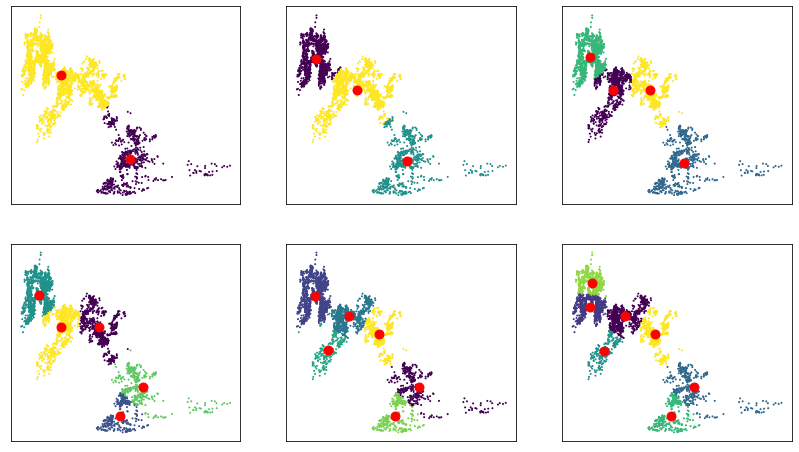

In [50]:
filas = 2
columnas = 3
fig, ax = plt.subplots(figsize=(14,8), nrows=filas, ncols=columnas)

for i in range (filas*columnas):
    col = i % columnas
    row = i // columnas
    modelo = KMeans(n_clusters = i+2)
    y_means = modelo.fit_predict(arr_esc)
    centroides = modelo.cluster_centers_
    ax[row][col].scatter(arr_esc[:,0], arr_esc[:,1], s=1, c=y_means)
    ax[row][col].scatter(centroides[:,0], centroides[:,1], s=80, color='r')
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)
    #ax[row][col].text(s = 'n='+str(i+2), fontsize=20, y=0, x=6)

plt.show()

In [51]:
n=3

In [52]:
arr = pd.concat([data_x,data_y],axis=1).dropna()
arr_esc = StandardScaler().fit_transform(arr)

arr=arr.reset_index()
arr.rename(columns={'index':'fecha'},inplace=True)

modelo = KMeans(n_clusters = n).fit(arr_esc)
y_means = modelo.fit_predict(arr_esc)
centroides = modelo.cluster_centers_ 

clustersList = list(y_means)
for i in range(len(arr)):
    arr.loc[i,'cluster'] = clustersList.pop()

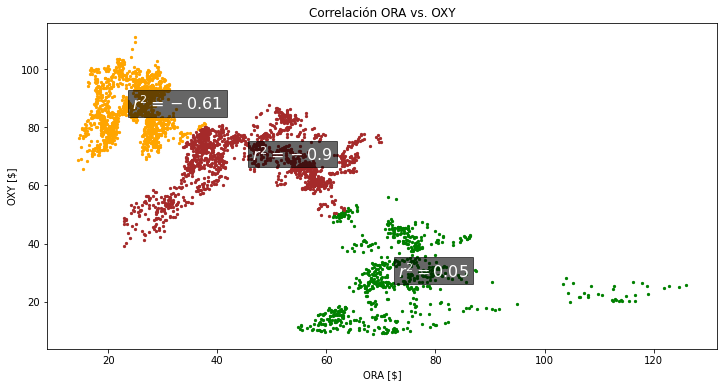

In [53]:
colores= ["orange","green","brown","cyan","magenta","blue","red","yellow","lightgreen","pink"]  
plt.figure(figsize=(12,6))
plt.title('Correlación ' + data_x.name + ' vs. ' + data_y.name)
plt.xlabel(data_x.name +' [$]')
plt.ylabel(data_y.name +' [$]')


for c in range(n):
        
    df_total = arr.loc[arr.cluster == c]
    co = round(df_total[label_x].corr(df_total[label_y]),2)

    plt.scatter(arr.loc[y_means == c][label_x],arr.loc[y_means == c][label_y],s=5, color=colores[c], cmap='rainbow')
            
    coords = (arr.loc[y_means==c][label_x].mean(), arr.loc[y_means==c][label_y].mean())
    t = plt.gca().annotate(f"$ r^2 = {co} $".format('g'), coords, fontsize=16, c="w")
    t.set_bbox(dict(facecolor='k', alpha=0.6, edgecolor='k'))
 
#plt.savefig('Clustering YPF')

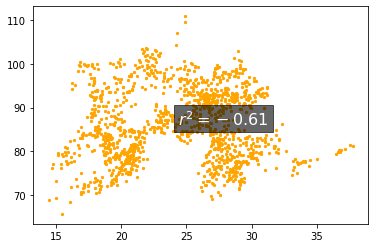

In [54]:
# Si quiero acceder a un cluster en particular seteo el valor de c

c=0

df_total = arr.loc[arr.cluster == c]
co = round(df_total[label_x].corr(df_total[label_y]),2)

plt.scatter(arr.loc[y_means == c][label_x],arr.loc[y_means == c][label_y],s=5, color=colores[c], cmap='rainbow')
        
coords = (arr.loc[y_means==c][label_x].mean(), arr.loc[y_means==c][label_y].mean())
t = plt.gca().annotate(f"$ r^2 = {co} $".format('g'), coords, fontsize=16, c="w")
t.set_bbox(dict(facecolor='k', alpha=0.6, edgecolor='k'))


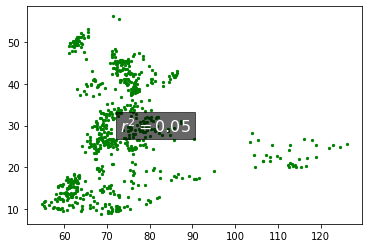

In [55]:
# Si quiero acceder a un cluster en particular seteo el valor de c

c=1

df_total = arr.loc[arr.cluster == c]
co = round(df_total[label_x].corr(df_total[label_y]),2)

plt.scatter(arr.loc[y_means == c][label_x],arr.loc[y_means == c][label_y],s=5, color=colores[c], cmap='rainbow')
        
coords = (arr.loc[y_means==c][label_x].mean(), arr.loc[y_means==c][label_y].mean())
t = plt.gca().annotate(f"$ r^2 = {co} $".format('g'), coords, fontsize=16, c="w")
t.set_bbox(dict(facecolor='k', alpha=0.6, edgecolor='k'))

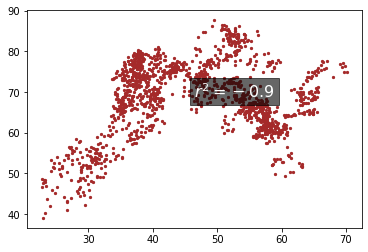

In [56]:
# Si quiero acceder a un cluster en particular seteo el valor de c

c=2

df_total = arr.loc[arr.cluster == c]
co = round(df_total[label_x].corr(df_total[label_y]),2)

plt.scatter(arr.loc[y_means == c][label_x],arr.loc[y_means == c][label_y],s=5, color=colores[c], cmap='rainbow')
        
coords = (arr.loc[y_means==c][label_x].mean(), arr.loc[y_means==c][label_y].mean())
t = plt.gca().annotate(f"$ r^2 = {co} $".format('g'), coords, fontsize=16, c="w")
t.set_bbox(dict(facecolor='k', alpha=0.6, edgecolor='k'))